In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


In [6]:
#dataset approval and loading
df=pd.read_csv("/content/drive/MyDrive/final submission/cwurData.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None
   worl

In [7]:
#Exploratory data analysis(EDA)


#summary statistics
print(df.describe())
#check for missing values
print(df.isnull().sum())




       world_rank  national_rank  quality_of_education  alumni_employment  \
count     2200.00        2200.00               2200.00            2200.00   
mean       459.59          40.28                275.10             357.12   
std        304.32          51.74                121.94             186.78   
min          1.00           1.00                  1.00               1.00   
25%        175.75           6.00                175.75             175.75   
50%        450.50          21.00                355.00             450.50   
75%        725.25          49.00                367.00             478.00   
max       1000.00         229.00                367.00             567.00   

       quality_of_faculty  publications  influence  citations  broad_impact  \
count             2200.00       2200.00    2200.00    2200.00       2000.00   
mean               178.89        459.91     459.80     413.42        496.70   
std                 64.05        303.76     303.33     264.37        

In [8]:
#columns with unique values
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print('\n')


Unique values in 'institution':
['Harvard University' 'Massachusetts Institute of Technology'
 'Stanford University' ... 'Babeș-Bolyai University'
 'Henan Normal University' 'Southwest Jiaotong University']


Unique values in 'country':
['USA' 'United Kingdom' 'Japan' 'Switzerland' 'Israel' 'Canada' 'France'
 'Sweden' 'South Korea' 'Italy' 'Germany' 'Netherlands' 'Finland' 'Norway'
 'Australia' 'Denmark' 'Singapore' 'Russia' 'China' 'Taiwan' 'Belgium'
 'South Africa' 'Spain' 'Brazil' 'Hong Kong' 'Ireland' 'Austria'
 'New Zealand' 'Portugal' 'Thailand' 'Czech Republic' 'Malaysia' 'India'
 'Greece' 'Mexico' 'Hungary' 'Argentina' 'Turkey' 'Poland' 'Saudi Arabia'
 'Chile' 'Iceland' 'Slovenia' 'Estonia' 'Lebanon' 'Croatia' 'Colombia'
 'Slovak Republic' 'Iran' 'Egypt' 'Serbia' 'Bulgaria' 'Lithuania' 'Uganda'
 'United Arab Emirates' 'Uruguay' 'Cyprus' 'Romania' 'Puerto Rico']




Data Visualization

In [9]:
#transform all data into numerical data
df_dummies=pd.get_dummies(df)
print(df_dummies.head())



   world_rank  national_rank  quality_of_education  alumni_employment  \
0           1              1                     7                  9   
1           2              2                     9                 17   
2           3              3                    17                 11   
3           4              1                    10                 24   
4           5              4                     2                 29   

   quality_of_faculty  publications  influence  citations  broad_impact  \
0                   1             1          1          1           NaN   
1                   3            12          4          4           NaN   
2                   5             4          2          2           NaN   
3                   4            16         16         11           NaN   
4                   7            37         22         22           NaN   

   patents  ...  country_Sweden  country_Switzerland  country_Taiwan  \
0        5  ...           False       

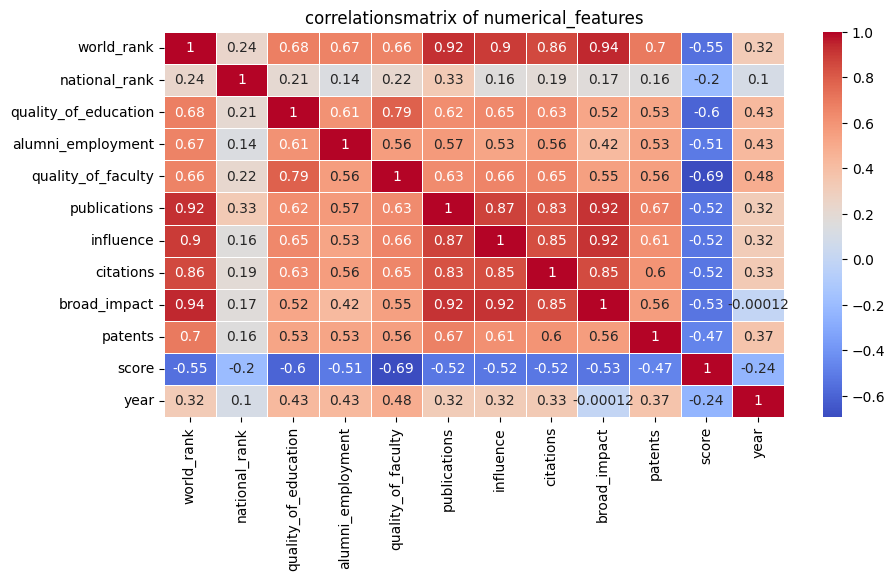

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5).figure.set_size_inches(10,5)
plt.title("correlationsmatrix of numerical_features")
plt.show()


In [19]:
print(df.columns)


Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')


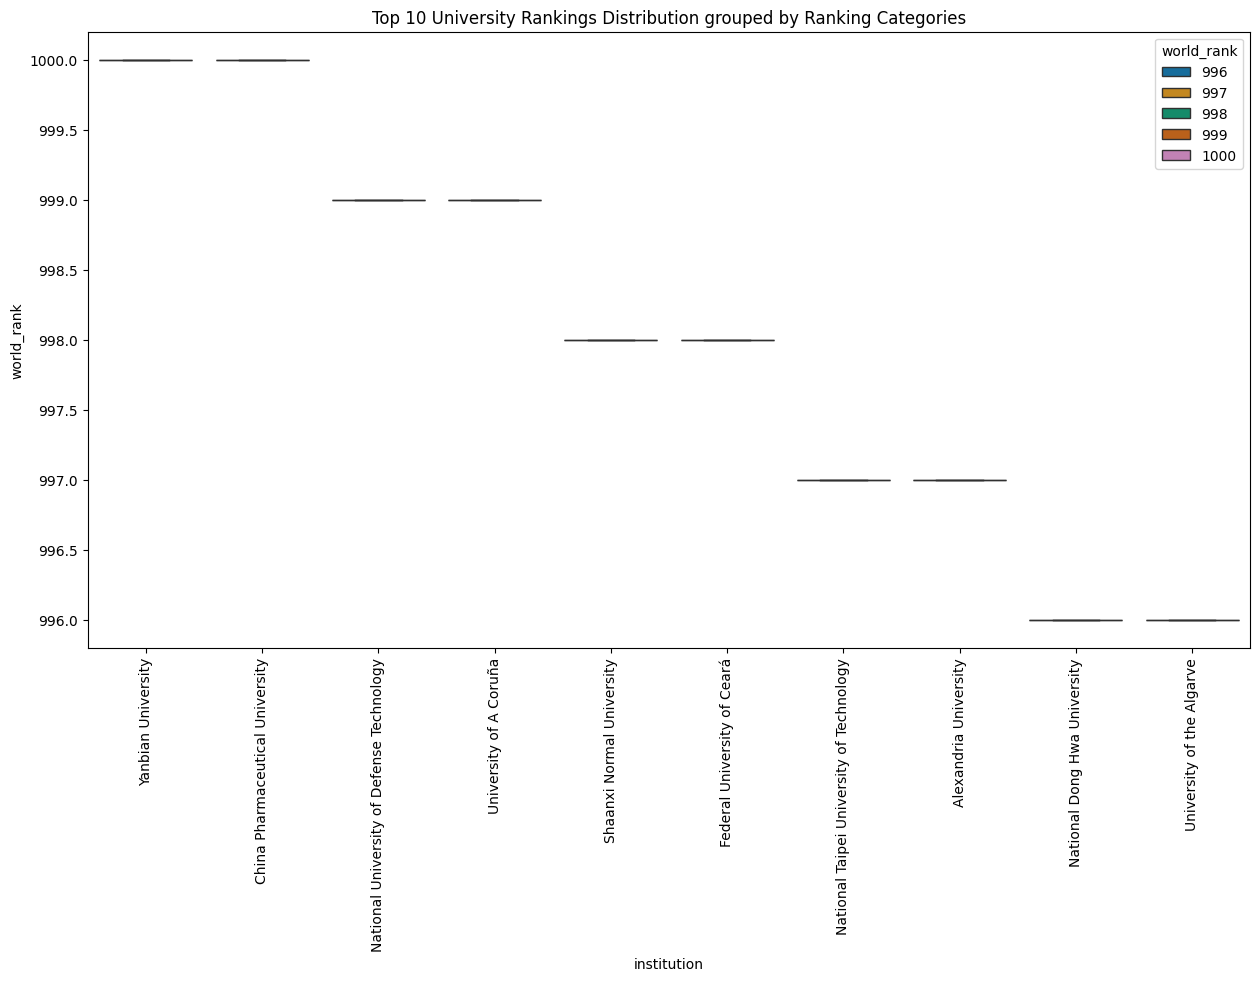

In [21]:
# Limit to top 10 institutions based on world_rank
top_institutions = df.nlargest(10, 'world_rank')

plt.figure(figsize=(15, 8))
sns.boxplot(x='institution', y='world_rank', hue='world_rank', data=top_institutions, palette='colorblind')
plt.title('Top 10 University Rankings Distribution grouped by Ranking Categories')
plt.xticks(rotation=90)
plt.show()


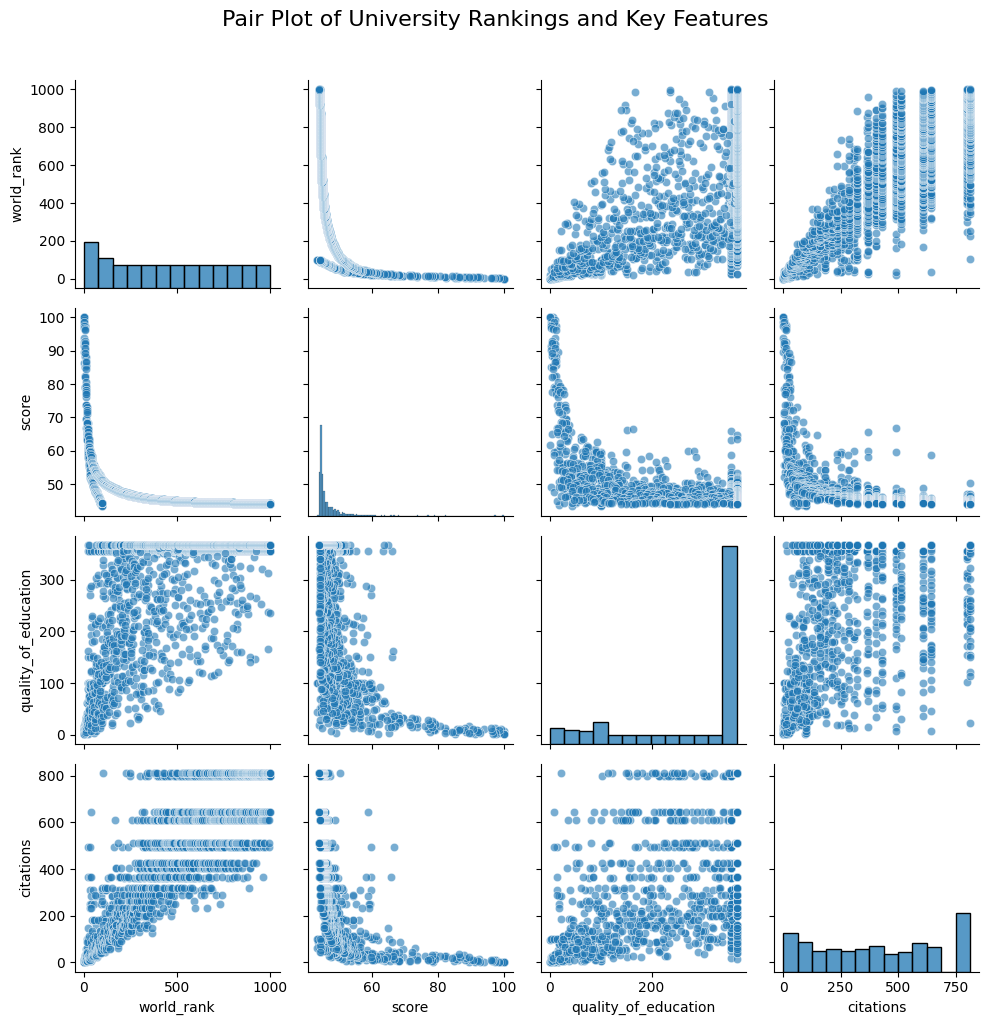

In [23]:
numerical_columns = ['world_rank', 'score', 'quality_of_education', 'citations']

sns.pairplot(df[numerical_columns], kind='scatter', palette='Blues', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of University Rankings and Key Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


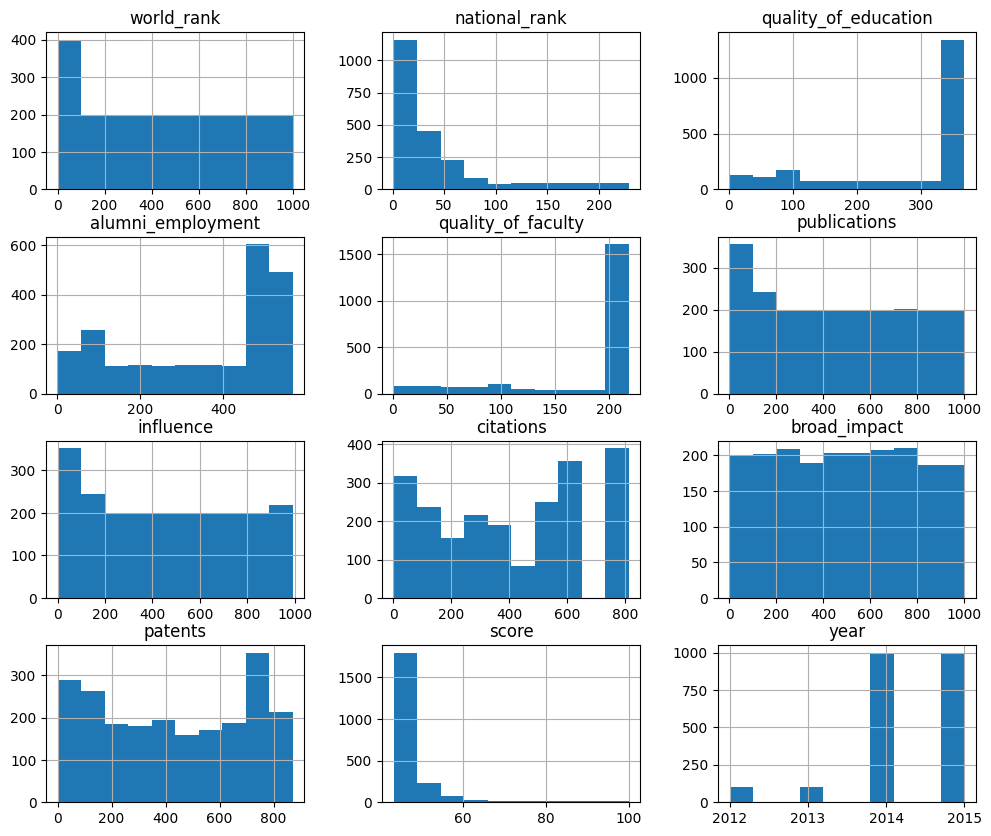

In [24]:
#Histograms for all features
df.hist(figsize=(12, 10))
plt.show()

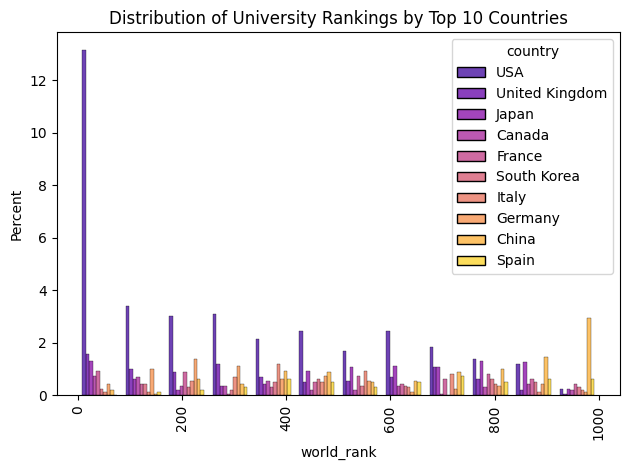

In [28]:
# Select the top N countries (e.g., top 10 countries by world rank)
top_countries = df.groupby('country').size().nlargest(10).index
df_filtered = df[df['country'].isin(top_countries)]

sns.histplot(data=df_filtered, x='world_rank', hue='country', palette='plasma', stat='percent', multiple='dodge', shrink=0.8)
plt.title('Distribution of University Rankings by Top 10 Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [35]:
categorical_features = ["country", "institution"]
numerical_features = ["world_rank", "score", "quality_of_education", "citations", "influence", "publications"]

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df_encoded['target_column'] = df_encoded['world_rank'].astype(int)

print(df_encoded.head())


   world_rank  national_rank  quality_of_education  alumni_employment  \
0           1              1                     7                  9   
1           2              2                     9                 17   
2           3              3                    17                 11   
3           4              1                    10                 24   
4           5              4                     2                 29   

   quality_of_faculty  publications  influence  citations  broad_impact  \
0                   1             1          1          1           NaN   
1                   3            12          4          4           NaN   
2                   5             4          2          2           NaN   
3                   4            16         16         11           NaN   
4                   7            37         22         22           NaN   

   patents  ...  institution_Åbo Akademi University  \
0        5  ...                               False   


<!-- Build logistic regression From Scratch and Accuracy calculation -->

Build logistic regression From Scratch and Accuracy **calculation** ****

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create binary classification target (Top 100 vs Others)
df['Top100'] = (df['world_rank'] <= 100).astype(int)

# Select features
features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty',
            'publications', 'influence', 'citations', 'broad_impact', 'patents']
X = df[features].values
y = df['Top100'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    epsilon = 1e-15  # To prevent log(0) error
    cost = (-1 / m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))

        if np.isnan(weights).any():
            print("NaN detected in weights. Stopping gradient descent.")
            break

    return weights, cost_history

# Initialize weights
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

# Train model
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Predictions
def predict(X, weights):
    return [1 if i >= 0.5 else 0 for i in sigmoid(np.dot(X, weights))]

# Evaluate model
y_pred = predict(X_test, weights)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


NaN detected in weights. Stopping gradient descent.
Accuracy: 0.8182
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


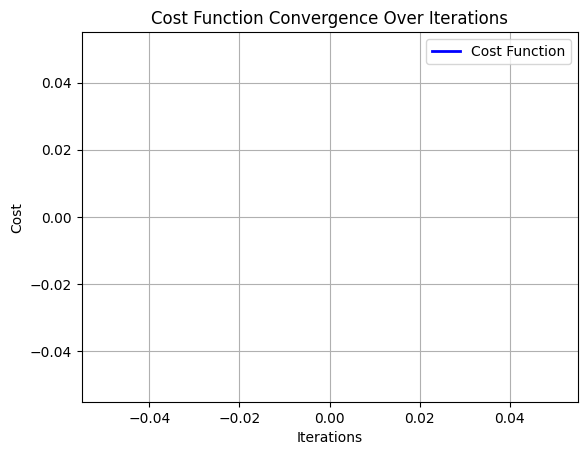

In [75]:
# Plot the cost function to assess model learning progress
plt.plot(range(len(cost_history)), cost_history, color='b', linewidth=2, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence Over Iterations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Explanation:
# The graph visualizes how well the model is learning.
# A decreasing cost function indicates that the model is optimizing weights correctly.
# If the curve flattens, it suggests convergence.
# If the cost does not decrease significantly or fluctuates, adjustments to learning rate or iterations may be needed.


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create binary classification target (Top 100 vs Others)
df['Top100'] = (df['world_rank'] <= 100).astype(int)

# Select features
features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty',
            'publications', 'influence', 'citations', 'broad_impact', 'patents']
X = df[features].values

The ROC curve shows the tradeoff between TPR and FPR at different thresholds. The AUC(Area Under Curve) indicates overall performance showing how well a model performs with value closer to 1 as excellent performance and 0.5 means random guessing.

## **Build two Classification models(Use models)**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create binary classification target (Top 100 vs Others)
df['Top100'] = (df['world_rank'] <= 100).astype(int)

# Select features
features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty',
            'publications', 'influence', 'citations', 'broad_impact', 'patents']
X = df[features].values
y = df['Top100'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model 1: Logistic Regression (Scikit-Learn)
model1 = LogisticRegression()
model1.fit(X_train, y_train)  # Now it should work without NaN errors
y_pred1 = model1.predict(X_test)

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Compare Performance
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"Model 1 (Logistic Regression) Accuracy: {acc1:.4f}")
print(f"Model 2 (Random Forest) Accuracy: {acc2:.4f}")

# Detailed Classification Reports
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred1))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred2))

Model 1 (Logistic Regression) Accuracy: 0.9682
Model 2 (Random Forest) Accuracy: 0.9795

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       360
           1       0.95      0.88      0.91        80

    accuracy                           0.97       440
   macro avg       0.96      0.93      0.94       440
weighted avg       0.97      0.97      0.97       440


Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       360
           1       0.96      0.93      0.94        80

    accuracy                           0.98       440
   macro avg       0.97      0.96      0.97       440
weighted avg       0.98      0.98      0.98       440



In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)

# Best Model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Optimized Logistic Regression Accuracy: {acc_lr:.4f}")


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Optimized Logistic Regression Accuracy: 0.9636


In [69]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Best Model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {acc_rf:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Random Forest Accuracy: 0.9773


In [70]:
from sklearn.feature_selection import RFE #RFE=Recursive Feature Elimination

# RFE for Logistic Regression
selector_lr = RFE(best_lr, n_features_to_select=5)
selector_lr.fit(X_train, y_train)

# Selected Features
selected_features_lr = [feature for feature, selected in zip(df_encoded.columns[:-1], selector_lr.support_) if selected]
print("Selected Features for Logistic Regression:", selected_features_lr)


Selected Features for Logistic Regression: ['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'citations']


In [71]:
selector_rf = RFE(best_rf, n_features_to_select=5)
selector_rf.fit(X_train, y_train)

selected_features_rf = [feature for feature, selected in zip(df_encoded.columns[:-1], selector_rf.support_) if selected]
print("Selected Features for Random Forest:", selected_features_rf)


Selected Features for Random Forest: ['world_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications']


Final Model Accuracy: 0.9818

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       360
           1       0.97      0.93      0.95        80

    accuracy                           0.98       440
   macro avg       0.98      0.96      0.97       440
weighted avg       0.98      0.98      0.98       440



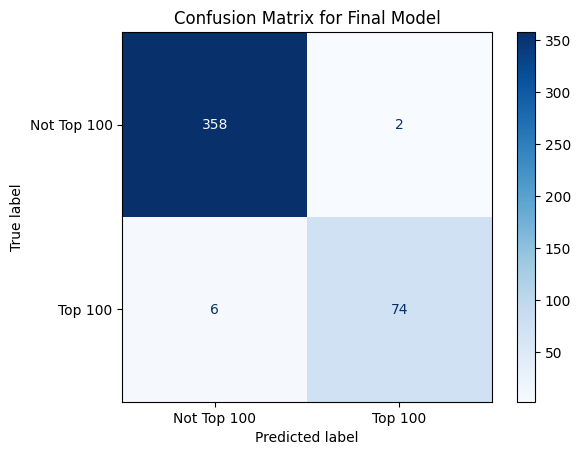

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier  # Example of final model (can be any model)

# Assuming df is your CWUR dataset
# Create binary classification target (Top 100 vs Others)
df['Top100'] = (df['world_rank'] <= 100).astype(int)

# Select features (make sure you select the relevant columns from your dataset)
features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty',
            'publications', 'influence', 'citations', 'broad_impact', 'patents']
X = df[features].values
y = df['Top100'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Example model: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_final = rf.predict(X_test)

# Evaluate Final Model
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {acc_final:.4f}")

# Classification report
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Top 100', 'Top 100'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Final Model')
plt.show()
